# Working with Legacy HEC-RAS Using RasControl

This notebook demonstrates **RasControl**, which provides a ras-commander style API for legacy HEC-RAS versions (3.x-4.x) using the HECRASController COM interface.

## What is RasControl?

**RasControl** wraps the HECRASController COM API with ras-commander conventions:

- ✅ **Use plan numbers** - `RasControl.run_plan("02")` not file paths
- ✅ **Integrated with ras object** - Works with `init_ras_project()`
- ✅ **Steady AND unsteady** - Extract profiles and time series
- ✅ **Auto-sets current plan** - Just pass the plan number!
- ✅ **No COM complexity** - Clean public API

## When to Use RasControl

| Use RasControl | Use HDF Methods |
|----------------|----------------|
| HEC-RAS 3.1, 4.1 | HEC-RAS 6.0+ |
| No HDF support | Modern versions |
| Legacy models | 2D mesh data |
| Version migration | Better performance |

## Supported Versions

3.0, 3.1, 4.0, 4.1, 5.0-5.0.7, 6.0-6.7 Beta

Accepts: `"4.1"`, `"41"`, `"5.0.6"`, `"506"`, `"6.6"`, `"66"`, etc.

## Setup

In [1]:
!pip install --upgrade ras-commander

In [2]:
import os, sys
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# 2. Import all required modules

# Import all ras-commander modules
from ras_commander import *

# Import the required libraries for this notebook
import os
from pathlib import Path
import pandas as pd
from IPython import display

# Import ras-commander
sys.path.append(str(Path(os.getcwd()).parent))
from ras_commander import RasExamples, init_ras_project, RasControl, ras, RasCmdr

print(f"RasControl supports: {list(RasControl.SUPPORTED_VERSIONS.keys())[:5]}...")

## Extract and Initialize Project

In [4]:
# Extract Bald Eagle Creek (has steady Plan 02 and unsteady Plan 01)
project_path = RasExamples.extract_project("Balde Eagle Creek")

# Initialize with version (required for RasControl)
init_ras_project(project_path, "6.6")  # or "66", "6.5", "4.1", "41", etc.

print(f"Project: {ras.project_name}")
print(f"Version: {ras.ras_version}")
print(f"\nPlans:")
print(ras.plan_df[['plan_number', 'Plan Title', 'flow_type']])

2025-10-30 08:03:28 - ras_commander.RasExamples - INFO - Found zip file: c:\GH\ras-commander\examples\Example_Projects_6_6.zip
2025-10-30 08:03:28 - ras_commander.RasExamples - INFO - Loading project data from CSV...
2025-10-30 08:03:28 - ras_commander.RasExamples - INFO - Loaded 68 projects from CSV.
2025-10-30 08:03:28 - ras_commander.RasExamples - INFO - ----- RasExamples Extracting Project -----
2025-10-30 08:03:28 - ras_commander.RasExamples - INFO - Extracting project 'Balde Eagle Creek'
2025-10-30 08:03:28 - ras_commander.RasExamples - INFO - Project 'Balde Eagle Creek' already exists. Deleting existing folder...
2025-10-30 08:03:28 - ras_commander.RasExamples - INFO - Existing folder for project 'Balde Eagle Creek' has been deleted.
2025-10-30 08:03:28 - ras_commander.RasExamples - INFO - Successfully extracted project 'Balde Eagle Creek' to c:\GH\ras-commander\examples\example_projects\Balde Eagle Creek
2025-10-30 08:03:28 - ras_commander.RasMap - INFO - Successfully parsed RA

Project: BaldEagle
Version: 6.6

Plans:
  plan_number                     Plan Title flow_type
0          01  Unsteady with Bridges and Dam  Unsteady
1          02                Steady Flow Run    Steady


# Part 1: Steady State (Plan 02)

Extract steady profiles. **Note:** `run_plan()` automatically sets Plan 02 as current!

In [5]:
# Run Plan 02 (auto-sets as current, then runs)
print("Running Plan 02 (Steady)...")
success, msgs = RasControl.run_plan("02") 
print(f"Success: {success}, Messages: {len(msgs)}")

2025-10-30 08:03:28 - ras_commander.RasControl - INFO - Opening HEC-RAS: RAS66.HECRASController (version: 6.6)


Running Plan 02 (Steady)...


2025-10-30 08:03:30 - ras_commander.RasControl - INFO - Opening project: C:\GH\ras-commander\examples\example_projects\Balde Eagle Creek\BaldEagle.prj
2025-10-30 08:03:30 - ras_commander.RasControl - INFO - Executing operation...
2025-10-30 08:03:30 - ras_commander.RasControl - INFO - Setting current plan to: Steady Flow Run
2025-10-30 08:03:30 - ras_commander.RasControl - INFO - Starting computation...
2025-10-30 08:03:34 - ras_commander.RasControl - INFO - Waiting for computation to complete...
2025-10-30 08:03:34 - ras_commander.RasControl - INFO - Computation completed (polled 0 times)
2025-10-30 08:03:34 - ras_commander.RasControl - INFO - Operation completed successfully
2025-10-30 08:03:34 - ras_commander.RasControl - INFO - Closing HEC-RAS...
2025-10-30 08:03:35 - ras_commander.RasControl - INFO - HEC-RAS closed via QuitRas()
2025-10-30 08:03:35 - ras_commander.RasControl - INFO - Terminated ras.exe process
2025-10-30 08:03:35 - ras_commander.RasControl - INFO - HEC-RAS fully c

Success: True, Messages: 3


In [6]:
# Extract steady results (auto-sets Plan 02 as current)
df_steady = RasControl.get_steady_results("02")

print(f"Rows: {len(df_steady)}")
print(f"Profiles: {df_steady['profile'].nunique()}")
print(f"XS: {df_steady['node_id'].nunique()}")
df_steady.head(10)

2025-10-30 08:03:35 - ras_commander.RasControl - INFO - Opening HEC-RAS: RAS66.HECRASController (version: 6.6)
2025-10-30 08:03:35 - ras_commander.RasControl - INFO - Opening project: C:\GH\ras-commander\examples\example_projects\Balde Eagle Creek\BaldEagle.prj
2025-10-30 08:03:35 - ras_commander.RasControl - INFO - Executing operation...
2025-10-30 08:03:35 - ras_commander.RasControl - INFO - Setting current plan to: Steady Flow Run
2025-10-30 08:03:35 - ras_commander.RasControl - INFO - Found 8 profiles
2025-10-30 08:03:35 - ras_commander.RasControl - INFO - Found 1 rivers
2025-10-30 08:03:37 - ras_commander.RasControl - INFO - Extracted 1424 result rows
2025-10-30 08:03:37 - ras_commander.RasControl - INFO - Operation completed successfully
2025-10-30 08:03:37 - ras_commander.RasControl - INFO - Closing HEC-RAS...
2025-10-30 08:03:37 - ras_commander.RasControl - INFO - HEC-RAS closed via QuitRas()
2025-10-30 08:03:37 - ras_commander.RasControl - INFO - Terminated ras.exe process
202

Rows: 1424
Profiles: 8
XS: 178


,river,reach,node_id,profile,wsel,min_ch_el,velocity,flow,froude,energy,max_depth
0,Bald Eagle,Loc Hav,138154.4,.5 year,660.588928,656.299988,3.657029,1.177402,0.363896,660.775635,4.288940
1,Bald Eagle,Loc Hav,138154.4,1 year,661.432068,656.299988,3.888445,1.654405,0.358103,661.629578,5.132080
2,Bald Eagle,Loc Hav,138154.4,2 year,662.602600,656.299988,4.519829,2.233629,0.365692,662.858398,6.302612
3,Bald Eagle,Loc Hav,138154.4,5 year,664.673218,656.299988,5.791487,3.227041,0.396946,665.082153,8.373230
4,Bald Eagle,Loc Hav,138154.4,10 year,666.190918,656.299988,6.828511,3.987156,0.426974,666.755981,9.890930
5,Bald Eagle,Loc Hav,138154.4,25 year,667.459351,656.299988,7.730279,4.592227,0.449943,668.181274,11.159363
6,Bald Eagle,Loc Hav,138154.4,50 year,668.543640,656.299988,8.564765,5.127679,0.471433,669.427612,12.243652
7,Bald Eagle,Loc Hav,138154.4,100 year,669.521484,656.299988,9.320695,5.608300,0.490210,670.566101,13.221497
8,Bald Eagle,Loc Hav,137690.8,.5 year,659.914612,653.729980,3.339625,0.703524,0.282183,660.072205,6.184631
9,Bald Eagle,Loc Hav,137690.8,1 year,660.849548,653.729980,3.501968,1.028502,0.274149,661.000366,7.119568


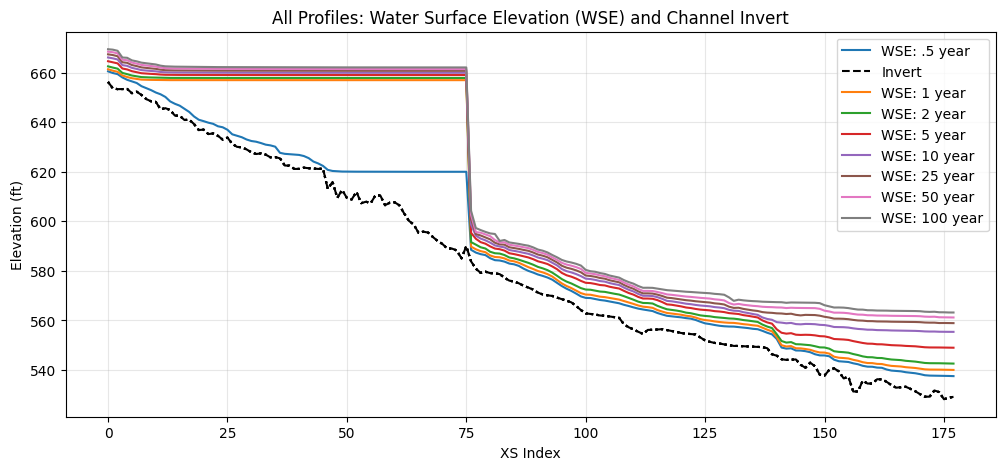

In [7]:
# Plot all profiles
profiles = df_steady['profile'].unique()
plt.figure(figsize=(12, 5))
for prof in profiles:
    prof_df = df_steady[df_steady['profile'] == prof]
    plt.plot(
        range(len(prof_df)), 
        prof_df['wsel'], 
        label=f"WSE: {prof}"
    )
    plt.plot(
        range(len(prof_df)), 
        prof_df['min_ch_el'], 
        'k--' if prof == profiles[0] else 'k:', 
        alpha=0.5 if prof != profiles[0] else 1.0, 
        label="Invert" if prof == profiles[0] else None
    )



plt.xlabel('XS Index')
plt.ylabel('Elevation (ft)')
plt.title("All Profiles: Water Surface Elevation (WSE) and Channel Invert")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [8]:
# Export
Path("working").mkdir(exist_ok=True)
df_steady.to_csv("working/steady_plan02.csv", index=False)
print(f"Exported {len(df_steady)} rows to working/steady_plan02.csv")

Exported 1424 rows to working/steady_plan02.csv


# Part 2: Unsteady Time Series (Plan 01)

Extract unsteady results. **Note:** Methods automatically set Plan 01 as current!

In [9]:
# Run Plan 01 (auto-sets as current, waits for completion)
# This may take 5-10 minutes!
print("Running Plan 01 (Unsteady)...")
# success, msgs = RasControl.run_plan(new_plan)  >> Don't use this, it always sets cores to max
RasCmdr.compute_plan("01", clear_geompre=True, num_cores=2)  ## Use this instead, it's ras-commander's direct command line wrapper with extra arguments
   
print(f"Success: {success}")

2025-10-30 08:03:38 - ras_commander.RasCmdr - INFO - Using ras_object with project folder: C:\GH\ras-commander\examples\example_projects\Balde Eagle Creek
2025-10-30 08:03:38 - ras_commander.RasGeo - INFO - Clearing geometry preprocessor file for single plan: C:\GH\ras-commander\examples\example_projects\Balde Eagle Creek\BaldEagle.p01
2025-10-30 08:03:38 - ras_commander.RasGeo - WARNING - No geometry preprocessor file found for: C:\GH\ras-commander\examples\example_projects\Balde Eagle Creek\BaldEagle.p01
2025-10-30 08:03:38 - ras_commander.RasGeo - INFO - Geometry dataframe updated successfully.
2025-10-30 08:03:38 - ras_commander.RasCmdr - INFO - Cleared geometry preprocessor files for plan: 01
2025-10-30 08:03:38 - ras_commander.RasUtils - INFO - Using provided plan file path: C:\GH\ras-commander\examples\example_projects\Balde Eagle Creek\BaldEagle.p01
2025-10-30 08:03:38 - ras_commander.RasUtils - INFO - Successfully updated file: C:\GH\ras-commander\examples\example_projects\Bal

Running Plan 01 (Unsteady)...


2025-10-30 08:05:05 - ras_commander.RasCmdr - INFO - HEC-RAS execution completed for plan: 01
2025-10-30 08:05:05 - ras_commander.RasCmdr - INFO - Total run time for plan 01: 87.61 seconds


Success: True


In [10]:
# Get output times (auto-sets Plan 01 as current)
times = RasControl.get_output_times("01")
print(f"Found {len(times)} timesteps")
print(f"First: {times[0]}")
print(f"Last: {times[-1]}")

2025-10-30 08:05:05 - ras_commander.RasControl - INFO - Opening HEC-RAS: RAS66.HECRASController (version: 6.6)
2025-10-30 08:05:05 - ras_commander.RasControl - INFO - Opening project: C:\GH\ras-commander\examples\example_projects\Balde Eagle Creek\BaldEagle.prj
2025-10-30 08:05:06 - ras_commander.RasControl - INFO - Executing operation...
2025-10-30 08:05:06 - ras_commander.RasControl - INFO - Setting current plan to: Unsteady with Bridges and Dam
2025-10-30 08:05:06 - ras_commander.RasControl - INFO - Found 76 output times
2025-10-30 08:05:06 - ras_commander.RasControl - INFO - Operation completed successfully
2025-10-30 08:05:06 - ras_commander.RasControl - INFO - Closing HEC-RAS...
2025-10-30 08:05:06 - ras_commander.RasControl - INFO - HEC-RAS closed via QuitRas()
2025-10-30 08:05:06 - ras_commander.RasControl - INFO - Terminated ras.exe process
2025-10-30 08:05:06 - ras_commander.RasControl - INFO - HEC-RAS fully closed


Found 76 timesteps
First: Max WS
Last: 24FEB1999 0400


In [11]:
# Extract unsteady (limit to 10 timesteps for demo)
df_unsteady = RasControl.get_unsteady_results("01", max_times=10)

print(f"Rows: {len(df_unsteady)}")
print(f"Timesteps: {df_unsteady['time_index'].nunique()}")
print(f"XS: {df_unsteady['node_id'].nunique()}")
df_unsteady.head(10)

2025-10-30 08:05:06 - ras_commander.RasControl - INFO - Opening HEC-RAS: RAS66.HECRASController (version: 6.6)
2025-10-30 08:05:06 - ras_commander.RasControl - INFO - Opening project: C:\GH\ras-commander\examples\example_projects\Balde Eagle Creek\BaldEagle.prj
2025-10-30 08:05:06 - ras_commander.RasControl - INFO - Executing operation...
2025-10-30 08:05:06 - ras_commander.RasControl - INFO - Setting current plan to: Unsteady with Bridges and Dam
2025-10-30 08:05:06 - ras_commander.RasControl - INFO - Extracting 10 time steps
2025-10-30 08:05:06 - ras_commander.RasControl - INFO - Found 1 rivers
2025-10-30 08:05:09 - ras_commander.RasControl - INFO - Extracted 1780 result rows
2025-10-30 08:05:09 - ras_commander.RasControl - INFO - Operation completed successfully
2025-10-30 08:05:09 - ras_commander.RasControl - INFO - Closing HEC-RAS...
2025-10-30 08:05:09 - ras_commander.RasControl - INFO - HEC-RAS closed via QuitRas()
2025-10-30 08:05:09 - ras_commander.RasControl - INFO - Terminat

Rows: 1780
Timesteps: 10
XS: 178


,river,reach,node_id,time_index,time_string,wsel,min_ch_el,velocity,flow,froude,energy,max_depth
0,Bald Eagle,Loc Hav,138154.4,1,Max WS,672.808289,656.299988,11.812529,7.167449,0.546461,674.472717,16.508301
1,Bald Eagle,Loc Hav,138154.4,2,18FEB1999 0000,660.651123,656.299988,3.564320,1.161268,0.352355,660.827637,4.351135
2,Bald Eagle,Loc Hav,138154.4,3,18FEB1999 0200,660.218872,656.299988,3.614365,1.002599,0.376157,660.407654,3.918884
3,Bald Eagle,Loc Hav,138154.4,4,18FEB1999 0400,661.313293,656.299988,3.882611,1.605426,0.361649,661.511597,5.013306
4,Bald Eagle,Loc Hav,138154.4,5,18FEB1999 0600,662.443420,656.299988,4.350002,2.118352,0.357496,662.681335,6.143433
5,Bald Eagle,Loc Hav,138154.4,6,18FEB1999 0800,663.560730,656.299988,4.943125,2.614835,0.367609,663.861633,7.260742
6,Bald Eagle,Loc Hav,138154.4,7,18FEB1999 1000,664.638428,656.299988,5.587611,3.109273,0.383870,665.019165,8.338440
7,Bald Eagle,Loc Hav,138154.4,8,18FEB1999 1200,665.657776,656.299988,6.254566,3.600435,0.403054,666.132507,9.357788
8,Bald Eagle,Loc Hav,138154.4,9,18FEB1999 1400,666.623291,656.299988,6.915609,4.074730,0.422223,667.202332,10.323303
9,Bald Eagle,Loc Hav,138154.4,10,18FEB1999 1600,667.523621,656.299988,7.587838,4.510049,0.440113,668.219055,11.223633


## Understanding "Max WS" in Unsteady Output

**Important:** HEC-RAS unsteady results include a special row with `time_string="Max WS"` (time_index=1). This contains the **maximum values that occurred at ANY computational timestep** during the entire simulation, not just at output intervals.

**Why this matters:**
- Output intervals (e.g., every 1 hour) may miss the peak flow/WSE
- Computational timesteps (e.g., every 30 seconds) capture the true maximum
- "Max WS" shows the absolute peak, even if it wasn't saved to an output interval

**How to use it:**
- Include in DataFrame for reference (critical data!)
- Filter out when plotting time series (it's not a timestep)
- Show as horizontal reference line on plots to indicate peak

The next cell demonstrates this pattern.

Plotting 9 timesteps at XS 138154.4
Max WSE (at any computational timestep): 672.81 ft


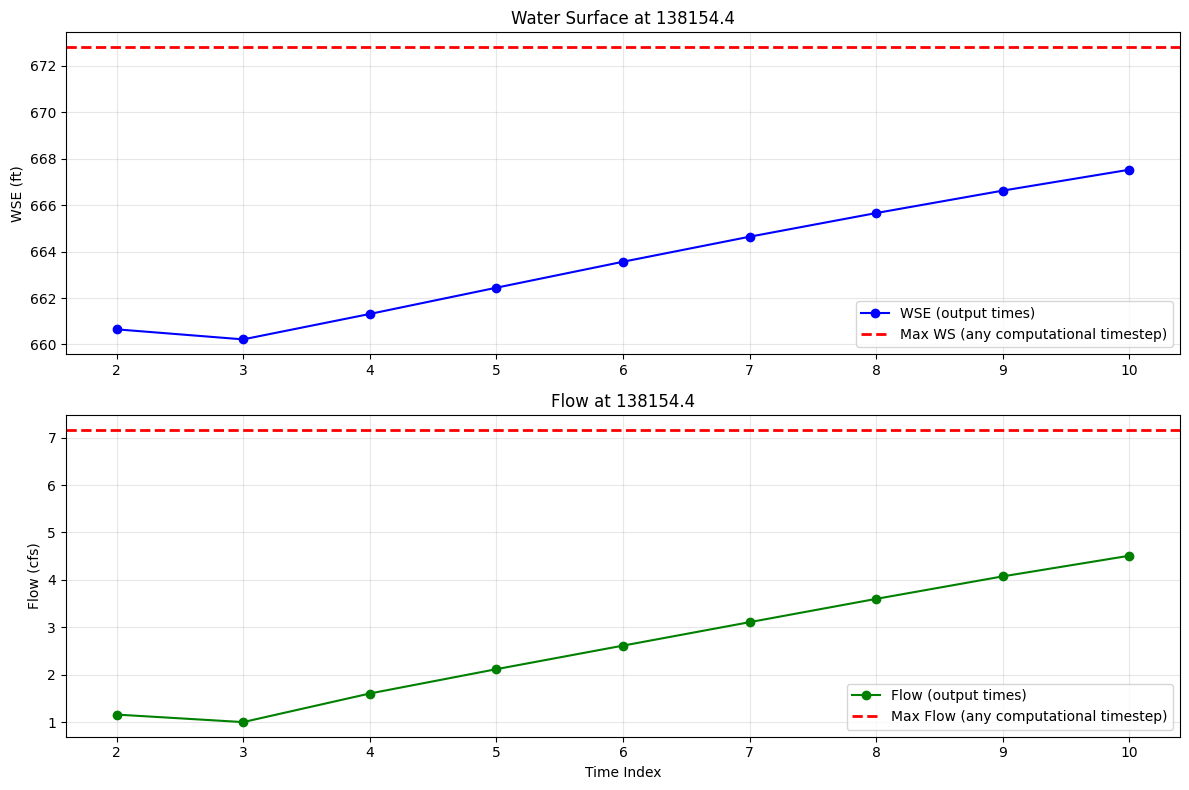

In [12]:
# Plot time series at one XS
xs = df_unsteady['node_id'].iloc[0]
xs_data = df_unsteady[df_unsteady['node_id'] == xs].sort_values('time_index')

# Separate "Max WS" from actual timesteps
max_ws_row = xs_data[xs_data['time_string'] == 'Max WS']
timeseries_data = xs_data[xs_data['time_string'] != 'Max WS']

print(f"Plotting {len(timeseries_data)} timesteps at XS {xs}")
print(f"Max WSE (at any computational timestep): {max_ws_row['wsel'].iloc[0]:.2f} ft")

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Water Surface - plot timeseries + max as reference line
ax1.plot(timeseries_data['time_index'], timeseries_data['wsel'], 'b-o', label='WSE (output times)')
ax1.axhline(max_ws_row['wsel'].iloc[0], color='r', linestyle='--', 
            linewidth=2, label='Max WS (any computational timestep)')
ax1.set_ylabel('WSE (ft)')
ax1.set_title(f'Water Surface at {xs}')
ax1.legend()
ax1.grid(alpha=0.3)

# Flow - plot timeseries + max as reference line
ax2.plot(timeseries_data['time_index'], timeseries_data['flow'], 'g-o', label='Flow (output times)')
ax2.axhline(max_ws_row['flow'].iloc[0], color='r', linestyle='--',
            linewidth=2, label='Max Flow (any computational timestep)')
ax2.set_xlabel('Time Index')
ax2.set_ylabel('Flow (cfs)')
ax2.set_title(f'Flow at {xs}')
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Summary

## Complete RasControl API

```python
# Initialize with version (flexible formats)
init_ras_project(path, "4.1")  # or "41", "66", "5.0.6", "506", etc.

# Run plans (auto-sets as current, waits for completion)
success, msgs = RasControl.run_plan("02")

# Extract steady (auto-sets as current)
df_steady = RasControl.get_steady_results("02")

# Extract unsteady (auto-sets as current, includes Max WS)
df_unsteady = RasControl.get_unsteady_results("01", max_times=10)

# Filter for time series plotting
df_timeseries = df_unsteady[df_unsteady['time_string'] != 'Max WS']
max_wse = df_unsteady[df_unsteady['time_string'] == 'Max WS']['wsel'].iloc[0]
```

## Key Features

- ✅ Plan numbers (not file paths)
- ✅ Auto-sets current plan
- ✅ Blocks until completion
- ✅ Steady AND unsteady
- ✅ All versions 3.0-6.7
- ✅ Flexible version formats
- ✅ Includes Max WS data
- ✅ Multi-version comparison (optional)

## What Was Demonstrated

1. **Steady workflow** - Plan 02 extraction and plotting
2. **Unsteady workflow** - Plan 01 time series with Max WS reference
3. **Max WS handling** - Understanding and visualizing peak values
4. **Multi-version comparison** - Optional cells for version validation

## Next Steps

- Apply to your legacy HEC-RAS models
- Run multi-version comparison for migration validation
- For HEC-RAS 6.0+: Use HDF methods for better performance
  - `04_steady_flow_analysis.ipynb`
  - `10_1d_hdf_data_extraction.ipynb`

### What This Creates

Running the multi-version comparison cells will:

**New Plans in Project:**
- `02_41`, `02_506`, `02_63`, `02_66` (steady)
- `01_41`, `01_506`, `01_63`, `01_66` (unsteady)

**CSV Files in working/:**
- `steady_v41.csv`, `steady_v506.csv`, `steady_v63.csv`, `steady_v66.csv`
- `unsteady_v41.csv`, `unsteady_v506.csv`, `unsteady_v63.csv`, `unsteady_v66.csv`

**Results:**
- All plans remain in project for further analysis
- CSV files for external comparison
- Plots showing version differences

2025-10-30 08:05:10 - ras_commander.RasMap - INFO - Successfully parsed RASMapper file: C:\GH\ras-commander\examples\example_projects\Balde Eagle Creek\BaldEagle.rasmap


Step 1: Updating Plan 01 intervals...


2025-10-30 08:05:10 - ras_commander.RasPlan - INFO - Successfully updated intervals in plan file: C:\GH\ras-commander\examples\example_projects\Balde Eagle Creek\BaldEagle.p01
2025-10-30 08:05:10 - ras_commander.RasUtils - INFO - File cloned from C:\GH\ras-commander\examples\example_projects\Balde Eagle Creek\BaldEagle.p01 to C:\GH\ras-commander\examples\example_projects\Balde Eagle Creek\BaldEagle.p03
2025-10-30 08:05:10 - ras_commander.RasUtils - INFO - Successfully updated file: C:\GH\ras-commander\examples\example_projects\Balde Eagle Creek\BaldEagle.p03
2025-10-30 08:05:10 - ras_commander.RasUtils - INFO - Project file updated with new Plan entry: 03
2025-10-30 08:05:10 - ras_commander.RasMap - INFO - Successfully parsed RASMapper file: C:\GH\ras-commander\examples\example_projects\Balde Eagle Creek\BaldEagle.rasmap
2025-10-30 08:05:10 - ras_commander.RasMap - INFO - Successfully parsed RASMapper file: C:\GH\ras-commander\examples\example_projects\Balde Eagle Creek\BaldEagle.rasma

  ✓ Output Interval: 1HOUR → 6MIN
  ✓ Mapping Interval: 1HOUR → 6MIN

=== MULTI-VERSION UNSTEADY COMPARISON ===

Processing HEC-RAS 4.1...
  Cloned to Plan 03
  Running Plan 03 (may take 5-10 min)...


2025-10-30 08:05:10 - ras_commander.RasControl - INFO - Opening project: C:\GH\ras-commander\examples\example_projects\Balde Eagle Creek\BaldEagle.prj
2025-10-30 08:05:10 - ras_commander.RasControl - INFO - Executing operation...
2025-10-30 08:05:10 - ras_commander.RasControl - INFO - Setting current plan to: Unsteady - v4.1
2025-10-30 08:05:10 - ras_commander.RasControl - INFO - Starting computation...
2025-10-30 08:06:49 - ras_commander.RasControl - INFO - Waiting for computation to complete...
2025-10-30 08:06:49 - ras_commander.RasControl - ERROR - Error checking completion status: RAS41.HECRASController.Compute_Complete
2025-10-30 08:06:49 - ras_commander.RasControl - INFO - Operation completed successfully
2025-10-30 08:06:49 - ras_commander.RasControl - INFO - Closing HEC-RAS...
2025-10-30 08:06:49 - ras_commander.RasControl - WARNING - QuitRas() failed: RAS41.HECRASController.QuitRas
2025-10-30 08:06:49 - ras_commander.RasControl - INFO - Terminated ras.exe process
2025-10-30 0

  ✓ Extracted 3560 rows -> working\unsteady_v41.csv

Processing HEC-RAS 5.0.4...
  Cloned to Plan 04
  Running Plan 04 (may take 5-10 min)...


2025-10-30 08:06:57 - ras_commander.RasControl - INFO - Opening project: C:\GH\ras-commander\examples\example_projects\Balde Eagle Creek\BaldEagle.prj
2025-10-30 08:06:57 - ras_commander.RasControl - INFO - Executing operation...
2025-10-30 08:06:57 - ras_commander.RasControl - INFO - Setting current plan to: Unsteady - v5.0.4
2025-10-30 08:06:57 - ras_commander.RasControl - INFO - Starting computation...
2025-10-30 08:08:26 - ras_commander.RasControl - INFO - Waiting for computation to complete...
2025-10-30 08:08:26 - ras_commander.RasControl - INFO - Computation completed (polled 0 times)
2025-10-30 08:08:26 - ras_commander.RasControl - INFO - Operation completed successfully
2025-10-30 08:08:26 - ras_commander.RasControl - INFO - Closing HEC-RAS...
2025-10-30 08:08:26 - ras_commander.RasControl - INFO - HEC-RAS closed via QuitRas()
2025-10-30 08:08:26 - ras_commander.RasControl - INFO - Terminated ras.exe process
2025-10-30 08:08:26 - ras_commander.RasControl - INFO - HEC-RAS fully

  ✓ Extracted 3560 rows -> working\unsteady_v504.csv

Processing HEC-RAS 5.0.6...
  Cloned to Plan 05
  Running Plan 05 (may take 5-10 min)...


2025-10-30 08:08:33 - ras_commander.RasControl - INFO - Opening project: C:\GH\ras-commander\examples\example_projects\Balde Eagle Creek\BaldEagle.prj
2025-10-30 08:08:33 - ras_commander.RasControl - INFO - Executing operation...
2025-10-30 08:08:33 - ras_commander.RasControl - INFO - Setting current plan to: Unsteady - v5.0.6
2025-10-30 08:08:33 - ras_commander.RasControl - INFO - Starting computation...
2025-10-30 08:08:48 - ras_commander.RasControl - INFO - Waiting for computation to complete...
2025-10-30 08:08:49 - ras_commander.RasControl - INFO - Computation completed (polled 0 times)
2025-10-30 08:08:49 - ras_commander.RasControl - INFO - Operation completed successfully
2025-10-30 08:08:49 - ras_commander.RasControl - INFO - Closing HEC-RAS...
2025-10-30 08:08:49 - ras_commander.RasControl - INFO - HEC-RAS closed via QuitRas()
2025-10-30 08:08:49 - ras_commander.RasControl - INFO - Terminated ras.exe process
2025-10-30 08:08:49 - ras_commander.RasControl - INFO - HEC-RAS fully

  ✓ Extracted 3560 rows -> working\unsteady_v506.csv

Processing HEC-RAS 6.3.1...
  Cloned to Plan 06
  Running Plan 06 (may take 5-10 min)...


2025-10-30 08:08:56 - ras_commander.RasControl - INFO - Opening project: C:\GH\ras-commander\examples\example_projects\Balde Eagle Creek\BaldEagle.prj
2025-10-30 08:08:56 - ras_commander.RasControl - INFO - Executing operation...
2025-10-30 08:08:56 - ras_commander.RasControl - INFO - Setting current plan to: Unsteady - v6.3.1
2025-10-30 08:08:56 - ras_commander.RasControl - INFO - Starting computation...
2025-10-30 08:10:24 - ras_commander.RasControl - INFO - Waiting for computation to complete...
2025-10-30 08:10:24 - ras_commander.RasControl - INFO - Computation completed (polled 0 times)
2025-10-30 08:10:24 - ras_commander.RasControl - INFO - Operation completed successfully
2025-10-30 08:10:24 - ras_commander.RasControl - INFO - Closing HEC-RAS...
2025-10-30 08:10:24 - ras_commander.RasControl - INFO - HEC-RAS closed via QuitRas()
2025-10-30 08:10:24 - ras_commander.RasControl - INFO - Terminated ras.exe process
2025-10-30 08:10:24 - ras_commander.RasControl - INFO - HEC-RAS fully

  ✓ Extracted 3560 rows -> working\unsteady_v631.csv

Processing HEC-RAS 6.6...
  Cloned to Plan 07
  Running Plan 07 (may take 5-10 min)...


2025-10-30 08:10:31 - ras_commander.RasControl - INFO - Opening project: C:\GH\ras-commander\examples\example_projects\Balde Eagle Creek\BaldEagle.prj
2025-10-30 08:10:31 - ras_commander.RasControl - INFO - Executing operation...
2025-10-30 08:10:31 - ras_commander.RasControl - INFO - Setting current plan to: Unsteady - v6.6
2025-10-30 08:10:31 - ras_commander.RasControl - INFO - Starting computation...
2025-10-30 08:11:58 - ras_commander.RasControl - INFO - Waiting for computation to complete...
2025-10-30 08:11:58 - ras_commander.RasControl - INFO - Computation completed (polled 0 times)
2025-10-30 08:11:58 - ras_commander.RasControl - INFO - Operation completed successfully
2025-10-30 08:11:58 - ras_commander.RasControl - INFO - Closing HEC-RAS...
2025-10-30 08:11:58 - ras_commander.RasControl - INFO - HEC-RAS closed via QuitRas()
2025-10-30 08:11:58 - ras_commander.RasControl - INFO - Terminated ras.exe process
2025-10-30 08:11:58 - ras_commander.RasControl - INFO - HEC-RAS fully c

  ✓ Extracted 3560 rows -> working\unsteady_v66.csv



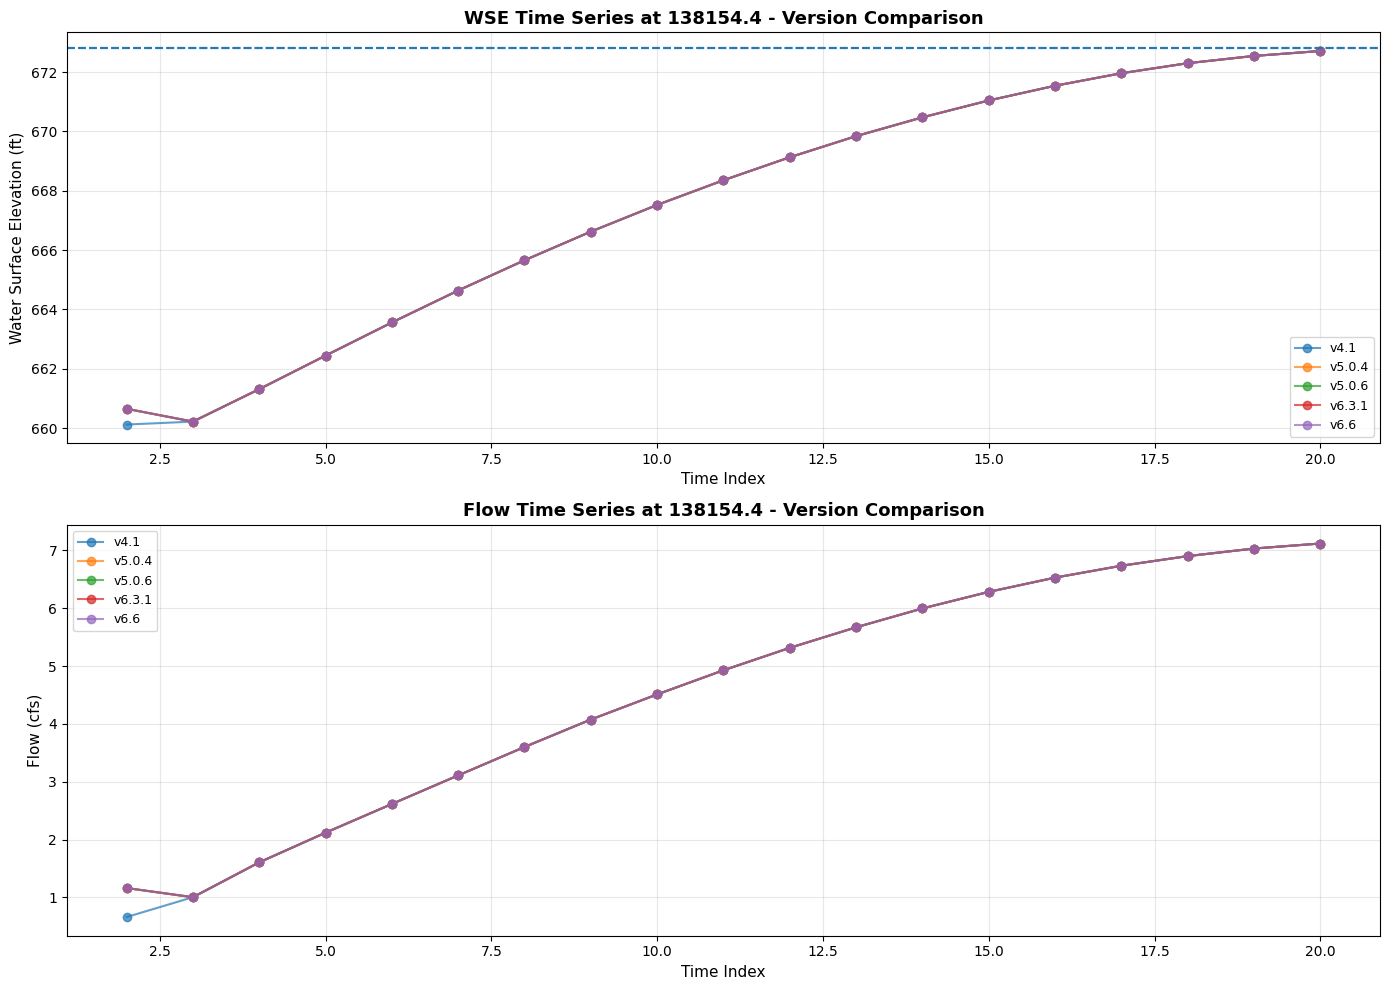


✓ Compared 5 versions
  Cross section: 138154.4
  Timesteps: 19

Max WSE by version:
  v4.1: 672.81 ft
  v5.0.4: 672.81 ft
  v5.0.6: 672.81 ft
  v6.3.1: 672.81 ft
  v6.6: 672.81 ft


In [13]:
# OPTIONAL: Multi-version unsteady comparison
# Uncomment to run (may take 2-4 HOURS!)

from ras_commander import RasPlan

# Step 1: Update Plan 01 output intervals for more detail
print("Step 1: Updating Plan 01 intervals...")
init_ras_project(project_path, "6.6")  # Use latest for modification

# Update intervals: Output=15MIN, Mapping=15MIN
RasPlan.update_plan_intervals("01", 
                              output_interval="6MIN",
                              mapping_interval="6MIN")
print("  ✓ Output Interval: 1HOUR → 6MIN")
print("  ✓ Mapping Interval: 1HOUR → 6MIN\n")

# Step 2: Run across versions
# All versions with actual COM interfaces
test_versions = [
    ("4.1", "41"),       # HEC-RAS 4.1     → RAS41.HECRASController
#    ("5.0.1", "501"),    # HEC-RAS 5.0.1   → RAS501.HECRASController  >> FREEZES, SKIP, LIKELY ISSUE WITH HECRASCONTROLLER
#    ("5.0.3", "503"),    # HEC-RAS 5.0.3   → RAS503.HECRASController
    ("5.0.4", "504"),    # HEC-RAS 5.0.4   → RAS504.HECRASController
    ("5.0.6", "506"),    # HEC-RAS 5.0.6   → RAS506.HECRASController
    ("6.3.1", "631"),    # HEC-RAS 6.3.1   → RAS631.HECRASController
    ("6.6", "66"),       # HEC-RAS 6.6     → RAS66.HECRASController
]

unsteady_results = {}
max_ws_data = {}  # Store Max WS separately

print("=== MULTI-VERSION UNSTEADY COMPARISON ===\n")

for version_name, version_code in test_versions:
    print(f"Processing HEC-RAS {version_name}...")
    
    # Clone Plan 01 for this version
    new_plan = RasPlan.clone_plan("01",
                      new_shortid=f"Unsteady_{version_code}",
                      new_title=f"Unsteady - v{version_name}")
    print(f"  Cloned to Plan {new_plan}")
    
    # Re-initialize with this version
    init_ras_project(project_path, version_name)
    
    # Run the plan (this will take several minutes!)
    print(f"  Running Plan {new_plan} (may take 5-10 min)...")
    success, msgs = RasControl.run_plan(new_plan)
    
    if success:
        # Extract results (limit to 20 timesteps for comparison)
        df = RasControl.get_unsteady_results(new_plan, max_times=20)
        
        # Separate Max WS from timeseries
        max_ws_data[version_name] = df[df['time_string'] == 'Max WS'].copy()
        unsteady_results[version_name] = df[df['time_string'] != 'Max WS'].copy()
        
        # Save CSV
        csv_path = Path(f"working/unsteady_v{version_code}.csv")
        df.to_csv(csv_path, index=False)
        print(f"  ✓ Extracted {len(df)} rows -> {csv_path}")
    else:
        print(f"  ✗ Failed")
    
    print()

# Plot comparison at one cross section
if unsteady_results:
    # Pick first XS
    xs_id = list(unsteady_results.values())[0]['node_id'].iloc[0]
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
    
    # Plot WSE time series for each version
    for version, df in unsteady_results.items():
        xs_data = df[df['node_id'] == xs_id].sort_values('time_index')
        ax1.plot(xs_data['time_index'], xs_data['wsel'], 
                 marker='o', label=f'v{version}', alpha=0.7)
    
    # Add Max WS reference lines
    for version, df in max_ws_data.items():
        max_wse = df[df['node_id'] == xs_id]['wsel'].iloc[0]
        ax1.axhline(max_wse, linestyle='--', alpha=0.5)
    
    ax1.set_xlabel('Time Index', fontsize=11)
    ax1.set_ylabel('Water Surface Elevation (ft)', fontsize=11)
    ax1.set_title(f'WSE Time Series at {xs_id} - Version Comparison', 
                 fontsize=13, fontweight='bold')
    ax1.legend(fontsize=9)
    ax1.grid(True, alpha=0.3)
    
    # Plot Flow time series
    for version, df in unsteady_results.items():
        xs_data = df[df['node_id'] == xs_id].sort_values('time_index')
        ax2.plot(xs_data['time_index'], xs_data['flow'],
                 marker='o', label=f'v{version}', alpha=0.7)
    
    ax2.set_xlabel('Time Index', fontsize=11)
    ax2.set_ylabel('Flow (cfs)', fontsize=11)
    ax2.set_title(f'Flow Time Series at {xs_id} - Version Comparison',
                 fontsize=13, fontweight='bold')
    ax2.legend(fontsize=9)
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Compute statistics
    print(f"\n✓ Compared {len(unsteady_results)} versions")
    print(f"  Cross section: {xs_id}")
    print(f"  Timesteps: {len(xs_data)}")
    
    # Compare Max WS across versions
    print("\nMax WSE by version:")
    for version, df in max_ws_data.items():
        max_wse = df[df['node_id'] == xs_id]['wsel'].iloc[0]
        print(f"  v{version}: {max_wse:.2f} ft")

else:
    print("Uncomment code above to run multi-version comparison")

## 3.2 Multi-Version Unsteady Comparison (Plan 01)

First, update Plan 01's output intervals for more detailed results, then run across versions.

2025-10-30 10:01:54 - ras_commander.RasUtils - INFO - File cloned from C:\GH\ras-commander\examples\example_projects\Balde Eagle Creek\BaldEagle.p02 to C:\GH\ras-commander\examples\example_projects\Balde Eagle Creek\BaldEagle.p11
2025-10-30 10:01:54 - ras_commander.RasUtils - INFO - Successfully updated file: C:\GH\ras-commander\examples\example_projects\Balde Eagle Creek\BaldEagle.p11
2025-10-30 10:01:54 - ras_commander.RasUtils - INFO - Project file updated with new Plan entry: 11
2025-10-30 10:01:54 - ras_commander.RasMap - INFO - Successfully parsed RASMapper file: C:\GH\ras-commander\examples\example_projects\Balde Eagle Creek\BaldEagle.rasmap
2025-10-30 10:01:54 - ras_commander.RasMap - INFO - Successfully parsed RASMapper file: C:\GH\ras-commander\examples\example_projects\Balde Eagle Creek\BaldEagle.rasmap
2025-10-30 10:01:54 - ras_commander.RasCmdr - INFO - Using ras_object with project folder: C:\GH\ras-commander\examples\example_projects\Balde Eagle Creek
2025-10-30 10:01:54

=== MULTI-VERSION STEADY STATE COMPARISON ===

Processing HEC-RAS 5.0.4...
  Cloned to Plan 11
  Running Plan 11 with 2 cores...


2025-10-30 10:01:59 - ras_commander.RasCmdr - INFO - HEC-RAS execution completed for plan: 11
2025-10-30 10:01:59 - ras_commander.RasCmdr - INFO - Total run time for plan 11: 5.38 seconds
2025-10-30 10:01:59 - ras_commander.RasControl - INFO - Opening HEC-RAS: RAS504.HECRASController (version: 5.0.4)
2025-10-30 10:01:59 - ras_commander.RasControl - INFO - Opening project: C:\GH\ras-commander\examples\example_projects\Balde Eagle Creek\BaldEagle.prj
2025-10-30 10:02:00 - ras_commander.RasControl - INFO - Executing operation...
2025-10-30 10:02:00 - ras_commander.RasControl - INFO - Setting current plan to: Steady - v5.0.4
2025-10-30 10:02:00 - ras_commander.RasControl - INFO - Found 8 profiles
2025-10-30 10:02:00 - ras_commander.RasControl - INFO - Found 1 rivers
2025-10-30 10:02:02 - ras_commander.RasControl - INFO - Extracted 1424 result rows
2025-10-30 10:02:02 - ras_commander.RasControl - INFO - Operation completed successfully
2025-10-30 10:02:02 - ras_commander.RasControl - INFO -

  ✓ Extracted 1424 rows -> working\steady_v504.csv

Processing HEC-RAS 5.0.6...
  Cloned to Plan 12
  Running Plan 12 with 2 cores...


2025-10-30 10:02:07 - ras_commander.RasCmdr - INFO - HEC-RAS execution completed for plan: 12
2025-10-30 10:02:07 - ras_commander.RasCmdr - INFO - Total run time for plan 12: 4.84 seconds
2025-10-30 10:02:07 - ras_commander.RasControl - INFO - Opening HEC-RAS: RAS506.HECRASController (version: 5.0.6)
2025-10-30 10:02:08 - ras_commander.RasControl - INFO - Opening project: C:\GH\ras-commander\examples\example_projects\Balde Eagle Creek\BaldEagle.prj
2025-10-30 10:02:08 - ras_commander.RasControl - INFO - Executing operation...
2025-10-30 10:02:08 - ras_commander.RasControl - INFO - Setting current plan to: Steady - v5.0.6
2025-10-30 10:02:08 - ras_commander.RasControl - INFO - Found 8 profiles
2025-10-30 10:02:08 - ras_commander.RasControl - INFO - Found 1 rivers
2025-10-30 10:02:11 - ras_commander.RasControl - INFO - Extracted 1424 result rows
2025-10-30 10:02:11 - ras_commander.RasControl - INFO - Operation completed successfully
2025-10-30 10:02:11 - ras_commander.RasControl - INFO -

  ✓ Extracted 1424 rows -> working\steady_v506.csv

Processing HEC-RAS 6.3.1...
  Cloned to Plan 13
  Running Plan 13 with 2 cores...


2025-10-30 10:02:16 - ras_commander.RasCmdr - INFO - HEC-RAS execution completed for plan: 13
2025-10-30 10:02:16 - ras_commander.RasCmdr - INFO - Total run time for plan 13: 5.54 seconds
2025-10-30 10:02:16 - ras_commander.RasControl - INFO - Opening HEC-RAS: RAS631.HECRASController (version: 6.3.1)
2025-10-30 10:02:16 - ras_commander.RasControl - INFO - Opening project: C:\GH\ras-commander\examples\example_projects\Balde Eagle Creek\BaldEagle.prj
2025-10-30 10:02:17 - ras_commander.RasControl - INFO - Executing operation...
2025-10-30 10:02:17 - ras_commander.RasControl - INFO - Setting current plan to: Steady - v6.3.1
2025-10-30 10:02:17 - ras_commander.RasControl - INFO - Found 8 profiles
2025-10-30 10:02:17 - ras_commander.RasControl - INFO - Found 1 rivers
2025-10-30 10:02:19 - ras_commander.RasControl - INFO - Extracted 1424 result rows
2025-10-30 10:02:19 - ras_commander.RasControl - INFO - Operation completed successfully
2025-10-30 10:02:19 - ras_commander.RasControl - INFO -

  ✓ Extracted 1424 rows -> working\steady_v631.csv

Processing HEC-RAS 6.6...
  Cloned to Plan 14
  Running Plan 14 with 2 cores...


2025-10-30 10:02:25 - ras_commander.RasCmdr - INFO - HEC-RAS execution completed for plan: 14
2025-10-30 10:02:25 - ras_commander.RasCmdr - INFO - Total run time for plan 14: 5.45 seconds
2025-10-30 10:02:25 - ras_commander.RasControl - INFO - Opening HEC-RAS: RAS66.HECRASController (version: 6.6)
2025-10-30 10:02:25 - ras_commander.RasControl - INFO - Opening project: C:\GH\ras-commander\examples\example_projects\Balde Eagle Creek\BaldEagle.prj
2025-10-30 10:02:25 - ras_commander.RasControl - INFO - Executing operation...
2025-10-30 10:02:25 - ras_commander.RasControl - INFO - Setting current plan to: Steady - v6.6
2025-10-30 10:02:25 - ras_commander.RasControl - INFO - Found 8 profiles
2025-10-30 10:02:25 - ras_commander.RasControl - INFO - Found 1 rivers
2025-10-30 10:02:28 - ras_commander.RasControl - INFO - Extracted 1424 result rows
2025-10-30 10:02:28 - ras_commander.RasControl - INFO - Operation completed successfully
2025-10-30 10:02:28 - ras_commander.RasControl - INFO - Clos

  ✓ Extracted 1424 rows -> working\steady_v66.csv



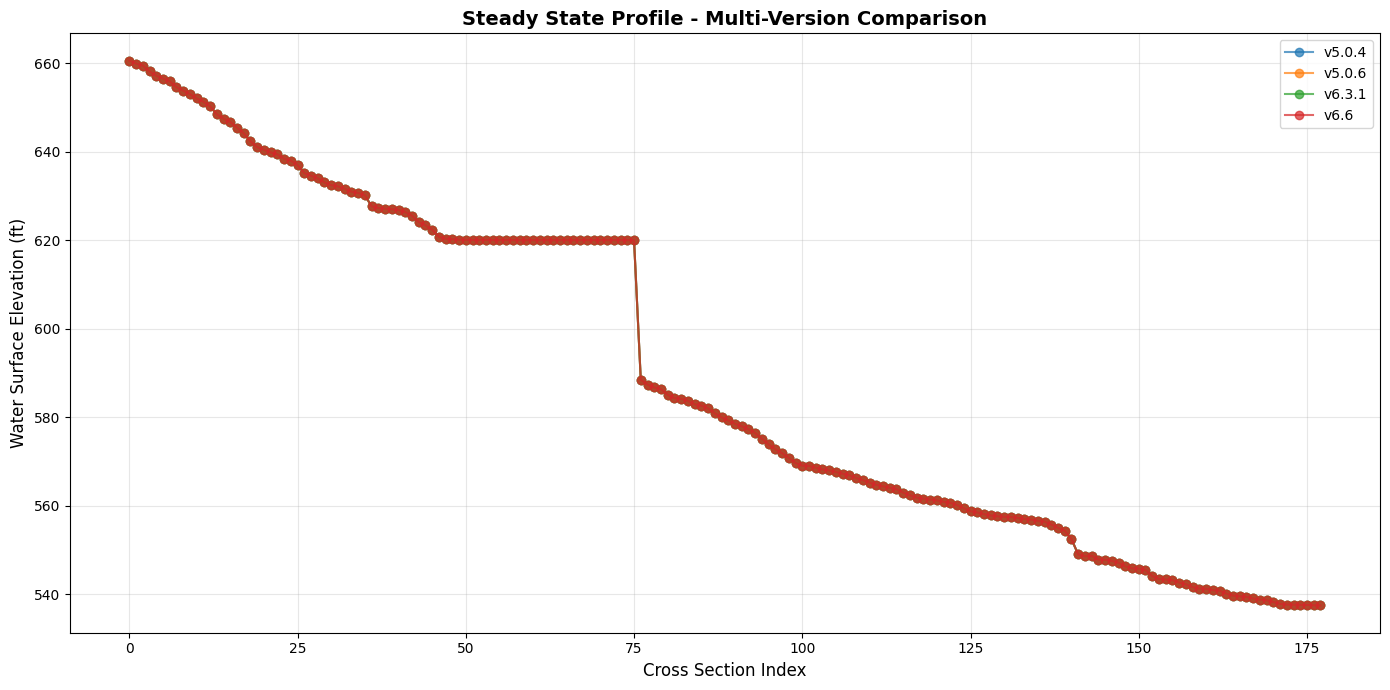


✓ Compared 4 versions


In [16]:
# OPTIONAL: Multi-version steady state comparison
# Uncomment to run (may take 20-30 minutes)

from ras_commander import RasPlan

# Versions to test - all versions with actual COM interfaces
test_versions = [
  #  ("4.1", "41"),       # HEC-RAS 4.1     → RAS41.HECRASController
  #  ("5.0.1", "501"),    # HEC-RAS 5.0.1   → RAS501.HECRASController
  #  ("5.0.3", "503"),    # HEC-RAS 5.0.3   → RAS503.HECRASController
    ("5.0.4", "504"),    # HEC-RAS 5.0.4   → RAS504.HECRASController
    ("5.0.6", "506"),    # HEC-RAS 5.0.6   → RAS506.HECRASController
    ("6.3.1", "631"),    # HEC-RAS 6.3.1   → RAS631.HECRASController
    ("6.6", "66"),       # HEC-RAS 6.6     → RAS66.HECRASController
]

steady_results = {}

print("=== MULTI-VERSION STEADY STATE COMPARISON ===\n")

for version_name, version_code in test_versions:
    print(f"Processing HEC-RAS {version_name}...")
    
    # Clone Plan 02 for this version
    new_plan = RasPlan.clone_plan("02",
                      new_shortid=f"Steady_{version_code}",
                      new_title=f"Steady - v{version_name}")
    print(f"  Cloned to Plan {new_plan}")
    
    # Re-initialize with this version
    init_ras_project(project_path, version_name)
    
    # Run the plan using ras-commander's compute_plan() instead of RasControl.run_plan
    print(f"  Running Plan {new_plan} with 2 cores...")
    try:
        # Use direct command line execution, preferred over RasControl.run_plan
        RasCmdr.compute_plan(new_plan, clear_geompre=True, num_cores=2)
        # Extract results
        df = RasControl.get_steady_results(new_plan)
        steady_results[version_name] = df

        # Save CSV
        csv_path = Path(f"working/steady_v{version_code}.csv")
        df.to_csv(csv_path, index=False)
        print(f"  ✓ Extracted {len(df)} rows -> {csv_path}")
    except Exception as e:
        print(f"  ✗ Failed: {e}")

    print()

# Plot comparison - first profile from each version
if steady_results:
    fig, ax = plt.subplots(figsize=(14, 7))
    
    for version, df in steady_results.items():
        first_prof = df[df['profile'] == df['profile'].iloc[0]]
        ax.plot(range(len(first_prof)), first_prof['wsel'], 
                marker='o', label=f'v{version}', alpha=0.7)
    
    ax.set_xlabel('Cross Section Index', fontsize=12)
    ax.set_ylabel('Water Surface Elevation (ft)', fontsize=12)
    ax.set_title('Steady State Profile - Multi-Version Comparison', fontsize=14, fontweight='bold')
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"\n✓ Compared {len(steady_results)} versions")

else:
    print("Uncomment code above to run multi-version comparison")

## 3.1 Multi-Version Steady State Comparison (Plan 02)

Run the steady plan across multiple HEC-RAS versions and compare results.

# Part 3: Multi-Version Comparison (OPTIONAL)

The following cells demonstrate running the same model across multiple HEC-RAS versions and comparing results. This is useful for:

- Version migration validation
- Understanding computation differences between versions
- Quality assurance when upgrading HEC-RAS

**Note:** These cells are optional and may take 30+ minutes to run depending on number of versions tested. Uncomment to execute.